<div style="background-color:rgba(20, 20, 20, 0.8); color:white; padding:10pt" >    

# **Lab Introduction to Image Processing**
&mdash; **`alain.lebret@ensicaen.fr`** &mdash;

### Part 2: Histogram and histogram equalization

</div>

## Dependencies

In [1]:
#
# Loads required libraries 
#
import numpy as np          # histogram()
import skimage              # scikit-image
from skimage import data    # some images to use
from skimage import io      # open, write, etc. image files
from skimage import color   # conversion between color spaces 
from skimage import filters # threshold_mean 
from matplotlib import pyplot as plt # also hist()

#
# Uncomments the lines below if using Google Colab
#
#from google.colab import drive

In [4]:
root_path = './ressources'
smaller = root_path + '/256x256'
medium = root_path + '/512x512'
various = root_path + '/divers'

## 1. Histogram

(*Pages 20 to 23 of Lecture Notes*)

An image's histogram is a graphical representation of the distribution of brightness levels in a digital image. The x-axis represents different luminosities (usually from 0 to 255 for grayscale images), and the y-axis indicates the number of pixels in the image that have each of these intensities. The histogram provides global information about the contrast and brightness in an image.

If the histogram is concentrated in a certain range of intensities (e.g., near the dark tones), it means the image lacks contrast and may appear too dark or too bright. A balanced distribution of intensities on the histogram generally indicates good image quality with appropriate contrast.

### Calculation and Display of Histogram: First Method

This method uses the [`histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy.histogram) function from *Numpy*. The first parameter requires the image to be flattened into a one-dimensional array (using the [`flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) function).

```python
histogram, bins = np.histogram(image.flatten(), bins=256, range=[0,255])
plt.plot(histogram)
```

#### Calculation and Display of Histogram: Method 2

This method uses the [`ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel) function from *Numpy* and also results in a one-dimensional array.

```python
plt.hist(image.ravel(), bins = 256, range = [0, 255])
```

#### Display of Histogram: Method 3

```python
plt.bar(bins[:-1], histogram, width=1, edgecolor='none')
```

#### Displaying the Histogram of a color image

The previous histograms were for grayscale images. For color images, you can use the following code. In this code, the [`zip()`](https://docs.python.org/3.3/library/functions.html#zip) function is used to take a series of one or more lists and return an iterator of tuples, where the first tuple contains the first element of each list, the second contains the second element of each list, and so on.

```python
cat = data.chelsea() # another inner image

# Tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# Create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 255])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        cat[:, :, channel_id], bins=256, range=(0, 255)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")
plt.show()
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 1.1**

1. Compute and display the histogram of the color image "play-balls.jpg".
2. Display the histogram of the 3 channels of the color image "play-balls.jpg".
3. Repeat with a color image of your choice.

---
    
</div>

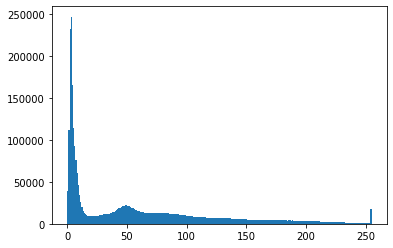

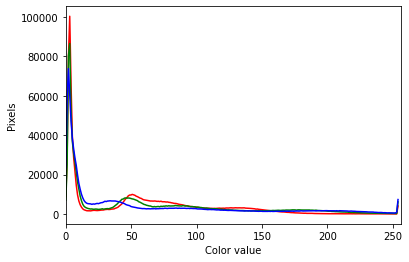

In [8]:
#
# TO COMPLETE WITH YOUR CODE
#


## 2. Simple Transformations and Histogram

We will perform some simple operations on grayscale images and observe their consequences on their histograms.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 2.1**

1. Perform the inversion operation on the grayscale image "circuit_512x512.jpg", then display on the same figure, the original image and the image obtained after inversion, as well as their histograms.
2. Modify the brightness and contrast of the image for different values and display the resulting images as well as their corresponding histograms.

---
    
</div>

In [ ]:
#
# TO COMPLETE WITH YOUR CODE
#


## 3. Histogram Equalization

(*Pages 27 to 28 of Lecture Notes*)

Histogram equalization is a method for adjusting the contrasts of an image by modifying the image's histogram so that it is approximately flat, meaning that each intensity level of the image appears about the same number of times in the histogram. This has the effect of making the dark areas of the image lighter and the details of the image more visible. The following `histeq()` function performs this operation.

```python
def histeq(image, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(image.flatten(), nbr_bins, [0, 255])
  cdf = imhist.cumsum()                # cumulative distribution function
  cdf = imhist.max() * cdf / cdf.max() # normalization
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min()) * 255 / (cdf_mask.max() - cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[image.astype('uint8')]
```

**Note**: the [`equalize_hist()`](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_hist) function from the `exposure` module also performs a histogram equalization.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 3.1**

1. Perform a histogram equalization of the image "circuit_512x512.jpg".
2. Display the original image and the image obtained after equalization on the same figure.
3. Display the histograms for the two previous images.

---    
</div>

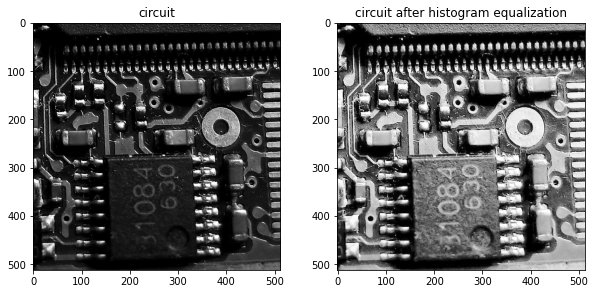

In [11]:
#
# TO COMPLETE WITH YOUR CODE
#


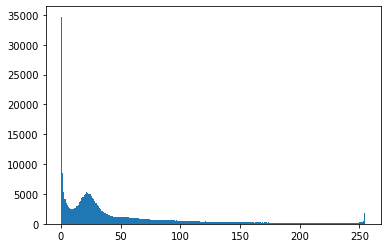

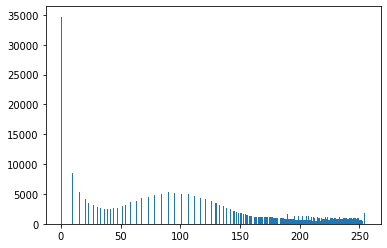

Although histogram equalization is an effective technique for enhancing contrast in images, especially when the image is represented by a narrow range of intensity values, there are certain situations where histogram equalization may not be beneficial or could even degrade the image quality:

1. Unnatural effects on photographs: Histogram equalization can produce unnatural or undesired effects in photographs, altering colors and light intensities in a way that does not reflect the actual scene.
2. Noise enhancement: The method can increase the contrast of background noise while decreasing the usable signal. This can be particularly problematic in images where the signal-to-noise ratio is already low.
3. Detail loss: In some cases, histogram equalization can result in a loss of detail in areas where the histogram is particularly dense, as it also stretches regions of the histogram where pixels are numerous, which can make certain details less visible.


<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 3.2**

1. Perform histogram equalization on the image "highnoise.jpg".
2. Does histogram equalization seem to improve the image dynamics (note: we will see techniques to reduce noise in images in an upcoming session)?

---
    
</div>

In [ ]:
#
# TO COMPLETE WITH YOUR CODE
#


## To recap

The histogram illustrates the distribution of intensities in an image, influencing contrast and brightness. Histogram equalization alters this distribution to enhance contrast, albeit with the risk of amplifying noise or losing details. In an upcoming session, we will discuss segmentation and thresholding methods that utilize histogram knowledge for implementation.